In [1]:
import pandas as pd
import docx
import numpy as np
import os

## Search directory for docx

In [2]:
def getFolderDocs(directory):
    folder = os.listdir(directory)
    
    for i in folder:
        if i[-4:] != 'docx':
            folder.pop(i)
    
    return folder

## Create DataFrame from Template Form

In [3]:
def readTemplate(template):
    template_tables = template.tables
    

    demographic_categories = {}
    
    i = 1

    for table in template_tables:
        data = []
    # Iterates over each cell and adds to list
        for row in table.rows:
            for cell in row.cells:
                for paragraph in cell.paragraphs:
                    data.append(paragraph.text)
    # Removes empty strings in list
        data = [x for x in data if x]

    # Adds dictionary key as the table number, values being a list of possible answers
        demographic_categories['Question ' + str(i)] = data
        i += 1
        
    # Creates list of all possible answers in the form
    template_answers = list(demographic_categories.values())
    template_answers = [inner for outer in template_answers for inner in outer]

        
    return demographic_categories, template_answers

In [4]:
def createDF(column_names):  
    # Returns list of tuples of all values (answers) with their associated key (question)
    cat_keys = [(i,x) for i in demographic_categories for x in demographic_categories[i]]

    # Creates multilevel dataframe with top level being the question number and the lower level being the possible answers for that question
    df = pd.DataFrame(columns=pd.MultiIndex.from_tuples(cat_keys, names=('Questions', 'Answers')))

    # Fills df with 0 to specify integer values
    df.loc[0, :] = 0
    return df

# Retrieve answers and fill into df

Potential for OOP here - retrieveAnswers and readTemplate are almost the same code at the start - create class

In [5]:
def retrieveAnswers(doc, template_answers):
    tables = doc.tables
    data = []

    for table in tables:
        for row in table.rows:
            for cell in row.cells:
                for paragraph in cell.paragraphs:
                    data.append(paragraph.text)
    
    data = [x for x in data if x]
    
    # Finds indices for filled cells that are not in answer cells
    tick_index = [index for index, value in enumerate(data) if value not in template_answers]

    # Map to change each element (x) of list to x-1
    demographic_index = list(map(lambda x: x-1, tick_index))

    # Returns a list of the answers given in doc
    demographics = [e for i, e in enumerate(data) if i in demographic_index]
    
    return demographics, demographic_index

In [6]:
def insertAnswers(template, df, answers, answers_index, row_index):
    # Start at 'Question 1' = start at index 0 
    question_no = 1
    i = 0
    # Fill row with 0s
    df.loc[row_index, :] = 0
    while i in range(0, len(answers)):
    # Question No. corresponds to df
        question = "Question " + str(question_no)
    # If the first answer is in question 1, updates the df count by +1
        if answers[i] in list(df[question].columns):
            df.loc[row_index, (question, answers[i])] += 1
            print('Added to {} {}'.format(question, answers[i]))
            i += 1
            question_no += 1
        else:
            question_no += 1
    # Catches error if question_no is more than the number of tables
    # Removes string when two answers in the same string, only takes first answer
            if question_no > len(template.tables):
                answers.pop(i)
                question_no = i + 1
            continue
    
    return df

In [7]:
def sumTotal(df):
    df.loc['Total', :] = df.sum()
    return df

In [8]:
template = docx.Document('ED Monitoring Template.docx')

demographic_categories, possible_answers = readTemplate(template)

df = createDF(demographic_categories)

In [9]:
folder = getFolderDocs(r'C:\Users\jreec\Data Science\Projects\Job 1')

In [10]:
f = folder[8]



In [11]:
row_index = 0
for filename in folder:
    try:
        doc = docx.Document(filename)
        print(doc)
        answers, answers_index = retrieveAnswers(doc, possible_answers)
        df = insertAnswers(template, df, answers, answers_index, row_index)
        row_index += 1
        
    except:
        print('Error in file {}'.format(filename))
        pass
    

Added to Question 2 Male
Added to Question 3 No
Added to Question 4 No
Added to Question 5 British / English / Welsh / Northern Irish / Scottish
Added to Question 6 No religion or belief
Added to Question 7 Heterosexual / straight
Added to Question 8 Yes
Added to Question 9 UK State School
Added to Question 10 No
Added to Question 11 No


C:\Users\jreec\Anaconda3\lib\site-packages\pandas\core\indexing.py:1761: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Users\jreec\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\jreec\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\jreec\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
C:\Users\jreec\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)


Added to Question 1 45 – 54
Added to Question 2 Male
Added to Question 3 No
Added to Question 4 No
Added to Question 5 Gypsy or Irish Traveller
Added to Question 6 Any other religion (write in)
Added to Question 7 Other
Added to Question 8 Did not attend University
Added to Question 9 UK State School
Added to Question 10 No
Added to Question 11 No
Added to Question 1 25 – 34
Added to Question 2 Male
Added to Question 3 No
Added to Question 4 No
Added to Question 5 Gypsy or Irish Traveller
Added to Question 6 Any other religion (write in)
Added to Question 7 Other
Added to Question 8 Did not attend University
Added to Question 9 UK State School
Added to Question 10 No
Added to Question 11 No
Added to Question 2 Male
Added to Question 1 25 – 34
Added to Question 2 Female
Added to Question 3 Yes
Added to Question 4 Yes, limited a little
Added to Question 5 Prefer not to say
Added to Question 6 Muslim
Added to Question 7 Heterosexual / straight
Added to Question 8 No
Added to Question 9 UK

In [12]:
df

Questions Question 1                                                        \
Answers      16 – 24 25 – 34 35 – 44 45 – 54 55 – 64 65+ Prefer not to say   
0                  0       0       0       0       0   0                 0   
1                  0       0       0       1       0   0                 0   
2                  0       1       0       0       0   0                 0   
3                  0       0       0       0       0   0                 0   
4                  0       1       0       0       0   0                 0   
5                  1       0       0       0       0   0                 0   
6                  0       0       0       0       0   1                 0   
7                  0       0       1       0       0   0                 0   
8                  0       1       0       0       0   0                 0   

Questions Question 2                           ...  \
Answers         Male Female Prefer not to say  ...   
0                  1      0                 0  ...   
1                  1      0                 0  ...   
2                  1      0                 0  ...   
3                  1      0                 0  ...   
4                  0      1                 0  ...   
5                  0      1                 0  ...   
6                  0      1                 0  ...   
7                  0      1                 0  ...   
8                  1      0                 0  ...   

Questions                     Question 9                   Question 10     \
Answers   Attended school outside the UK Prefer not to say         Yes No   
0                                      0                 0           0  1   
1                                      0                 0           0  1   
2                                      0                 0           0  1   
3                                      0                 0           0  0   
4                                      0                 0           1  0   
5                                      0                 0           0  1   
6                                      1                 0           0  1   
7                                      0                 0           0  1   
8                                      0                 0           0  1   

Questions                   Question 11                           \
Answers   Prefer not to say          No Yes, 1 – 19 hours a week   
0                         0           1                        0   
1                         0           1                        0   
2                         0           1                        0   
3                         0           0                        0   
4                         0           0                        1   
5                         0           1                        0   
6                         0           1                        0   
7                         0           1                        0   
8                         0           1                        0   

Questions                                                         \
Answers   Yes, 20 – 49 hours a week Yes, 50 or more hours a week   
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   
5                                 0                            0   
6                                 0                            0   
7                                 0                            0   
8                                 0                            0   

Questions                    
Answers   Prefer not to say  
0                         0  
1                         0  
2                         0  
3                         0  
4                   

In [13]:
# Removes any columns with sums = 0
#df.loc[:, (df != 0).any(axis=0)].to_excel('Finish.xlsx')

PermissionError: [Errno 13] Permission denied: 'Finish.xlsx'

In [ ]:
#df.to_excel('Finish.xlsx')

In [14]:
df.loc['Total'] = df.sum()

In [15]:
df = df.loc[:, (df != 0).any(axis=0)]

In [16]:
totals = df[df.index == 'Total']

In [17]:
import seaborn as sns

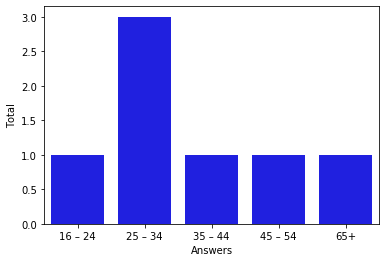

In [18]:
totals['Question 1'].transpose()

sns.barplot(data = totals['Question 1'].transpose().reset_index(), x='Answers', y='Total', color='blue')

In [19]:
df

Questions Question 1                             Question 2        Question 3  \
Answers      16 – 24 25 – 34 35 – 44 45 – 54 65+       Male Female        Yes   
0                  0       0       0       0   0          1      0          0   
1                  0       0       0       1   0          1      0          0   
2                  0       1       0       0   0          1      0          0   
3                  0       0       0       0   0          1      0          0   
4                  0       1       0       0   0          0      1          1   
5                  1       0       0       0   0          0      1          0   
6                  0       0       0       0   1          0      1          1   
7                  0       0       1       0   0          0      1          0   
8                  0       1       0       0   0          1      0          1   
Total              1       3       1       1   1          5      4          3   

Questions            Question 4  ...        Question 7 Question 8     \
Answers   No Yes, limited a lot  ... Prefer not to say        Yes No   
0          1                  0  ...                 0          1  0   
1          1                  0  ...                 0          0  0   
2          1                  0  ...                 0          0  0   
3          0                  0  ...                 0          0  0   
4          0                  0  ...                 0          0  1   
5          1                  0  ...                 0          0  0   
6          0                  1  ...                 1          1  0   
7          1                  0  ...                 0          0  0   
8          0                  0  ...                 0          0  0   
Total      5                  1  ...                 1          2  1   

Questions                                Question 9  \
Answers   Did not attend University UK State School   
0                                 0               1   
1                                 1               1   
2                                 1               1   
3                                 0               0   
4                                 0               1   
5                                 1               1   
6                                 0               0   
7                                 1               1   
8                                 1               1   
Total                             5               7   

Questions                                Question 10    Question 11  \
Answers   Attended school outside the UK         Yes No          No   
0                                      0           0  1           1   
1                                      0           0  1           1   
2                                      0           0  1           1   
3                                      0           0  0           0   
4                                      0           1  0           0   
5                                      0           0  1           1   
6                                      1           0  1           1   
7                                      0           0  1           1   
8                                      0           0  1           1   
Total                                  1           1  7           7   

Questions                           
Answers   Yes, 1 – 19 hours a week  
0                                0  
1                                0  
2                                0  
3                                0  
4                                1  
5                                0  
6                                0  
7                                0  
8                                0  
Total                            1  

[10 rows x 35 columns]

In [ ]:
# Pie chart - Gender ratio
# Age bar chart?
# Number of applicants that have answered 

In [26]:
doc = docx.Document('ED Monitoring Template.docx')

In [27]:
doc

In [28]:
paras = doc.paragraphs
for para in paras:
    print(para.text)

E&D Monitoring Form

Please answer each question in turn by choosing one option only, unless otherwise indicated.  If you do not wish to answer the question, please choose the option “Prefer not to say‟ rather than leaving the question blank.

Age

From the list of age bands below, please indicate the category that includes your current age in years:



Gender

What is your gender?


Disability

The Equality Act 2010 generally defines a disabled person as someone who has a mental or physical impairment that has a substantial and long-term adverse effect on the person’s ability to carry out normal day-to-day activities.

(a)	Do you consider yourself to have a disability according to the definition in the Equality Act?







(b)	Are your day-to-day activities limited because of a health problem or disability which has lasted, or is expected to last, at least 12 months?



Ethnic Group

What is your ethnic group?





Religion or belief

What is your religion or belief?



Sexual orienta

In [31]:
for para in paras:
    print(len(para.text))

19
0
221
0
3
0
103
0
0
0
6
0
20
0
0
10
0
227
0
98
0
0
0
0
0
0
0
146
0
0
0
12
0
26
0
0
0
0
0
18
0
32
0
0
0
18
0
32
0
0
0
0
0
0
0
0
25
0
131
0
0
80
0
0
0
23
0
61
0
0
118
54
29
62
0
0
43
0
0


In [43]:
# Searches all paragraphs and returns short paragraphs (hopefully 'titles') 
# (a) (b) contin the subtitles that include questions
for para in paras:
    if len(para.text) > 0:
        if '(a)' in para.text:
            print(para.text)
        elif '(b)' in para.text:
            print(para.text)
        elif len(para.text) < 29:
            if '?' not in para.text: # Ensures no questions are added to list
                print(para.text)


E&D Monitoring Form
Age
Gender
Disability
(a)	Do you consider yourself to have a disability according to the definition in the Equality Act?
(b)	Are your day-to-day activities limited because of a health problem or disability which has lasted, or is expected to last, at least 12 months?
Ethnic Group
Religion or belief
Sexual orientation
Socio-economic background
(a)	If you went to University (to study a BA, BSc course or higher), were you part of the first generation of your family to do so?
(b)	Did you mainly attend a state or fee-paying school between the ages 11 – 18?
Caring responsibilities
(a)	Are you a primary carer for a child or children under 18?
(b)	Do you look after, or give any help or support to family members, friends, neighbours or others because of either:


### AIM:
Convert names 'Question 1... N' to the question itself 

In [49]:
# Return 'Questions'
list(df.columns.levels[0])

['Question 1',
 'Question 10',
 'Question 11',
 'Question 2',
 'Question 3',
 'Question 4',
 'Question 5',
 'Question 6',
 'Question 7',
 'Question 8',
 'Question 9']

In [70]:
questions = []
for para in paras:
    if len(para.text) > 0:
        if '(a)' in para.text:
            questions.append(para.text)
        elif '(b)' in para.text:
            questions.append(para.text)
        elif len(para.text) < 29:
            if '?' not in para.text: # Ensures no questions are added to list
                questions.append(para.text)

questions = questions[1:]

In [71]:
# Potentially change this to regex so it fits (c), (d), ... etc
idx_remove = []
for i, question in enumerate(questions):
    if question[0:3] == '(a)':
        idx_remove.append(i-1)
        questions[i] = question[4:]
    elif question[0:3] == '(b)':
        questions[i] = question[4:]

questions = [e for i, e in enumerate(questions) if i not in idx_remove]

In [72]:
questions

# Turn these questions into 'titles' for a report viz by using semantic analysis?

['Age',
 'Gender',
 'Do you consider yourself to have a disability according to the definition in the Equality Act?',
 'Are your day-to-day activities limited because of a health problem or disability which has lasted, or is expected to last, at least 12 months?',
 'Ethnic Group',
 'Religion or belief',
 'Sexual orientation',
 'If you went to University (to study a BA, BSc course or higher), were you part of the first generation of your family to do so?',
 'Did you mainly attend a state or fee-paying school between the ages 11 – 18?',
 'Are you a primary carer for a child or children under 18?',
 'Do you look after, or give any help or support to family members, friends, neighbours or others because of either:']